In [3]:
import pandas as pd
from utils import *
import numpy as np 
import csv
from itertools import islice
import matplotlib.pyplot as plt
import os
import subprocess
from joblib import Parallel, delayed
from pathlib import Path
import glob
print(PROJ_DIR)


/home/al_dente/Downloads/GRiPE/GRiPE


In [3]:
for i in range(4):
    args = 'params_example.grp', '1', '10000000000'
    proc = subprocess.run(['/home/al_dente/.jdks/openjdk-20/bin/java', '-classpath', JAVA_CLASS_PATH, JAVA_CLASS, *args], cwd=PROJ_DIR, capture_output=True)
    output = proc.stdout.decode()
    outerr = proc.stderr.decode()
    if not (outerr == ''):
        print(outerr + '\n')

# TAU = 0

In [88]:
#path = 'results_example/results_tau_not_0/first_reach/only_tstaunot0'
path = os.path.join('results_example', 'results_tau_0', 'first_reach', 'only_target_sites') 
first_reach_list = []
with os.scandir(path) as it:
    for entry in it:
        if entry.name.endswith(".csv") and entry.is_file() and str(entry).find("target_site")!=-1 and str(entry).find("target_site_follow"):
            avrg_first_reach.append(pd.read_csv(entry.path,sep=',', usecols = [1]))


In [97]:
sum(avrg_first_reach) / len(avrg_first_reach)

,"""firstReached"""
0,29.594386
1,22.383261
2,23.046731
3,25.836327
4,25.836231
...,...
78,24.020630
79,23.610008
80,19.287411
81,19.568957


In [95]:
#print(len(avrg_first_reach))
tmp_vector = [0]
for i in avrg_first_reach:
    #print(tmp_vector)
    tmp_vector += i
res_vector = tmp_vector/len(avrg_first_reach)
print(res_vector)


ValueError: Unable to coerce to Series, length must be 1: given 0

In [87]:
res_vector_tau_not0 = tmp_vector/len(avrg_first_reach)


# TAU = 10^-5

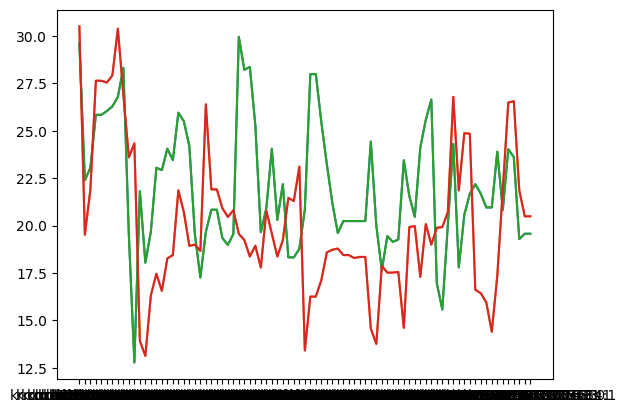

In [93]:
sites_loc = pd.read_csv('results_example/results_tau_0/first_reach/drosoph_kr_target_site_12420269239604022068.csv',
sep = ',',usecols=[0])
#print(sites_loc)
#print(res_vector)
#DataFrame = pd.DataFrame(sites_loc,res_vector_df)
#print(hash(sites_loc))
plt.plot(sites_loc.targetSite.to_numpy(), res_vector[" \"firstReached\""].to_numpy(),
         sites_loc.targetSite.to_numpy(), res_vector_tau_not0[" \"firstReached\""].to_numpy())
plt.plot(sites_loc.targetSite.to_numpy(), res_vector[" \"firstReached\""].to_numpy(),
         sites_loc.targetSite.to_numpy(), res_vector_tau_not0[" \"firstReached\""].to_numpy())


In [6]:
PROJ_DIR

'/home/al_dente/Downloads/GRiPE/GRiPE'